# Converting a Classification Problem to an Ordinary Regression Problem by Assigning Numeric Values to Binary Labels

In [1]:
import sys
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# arrange data into list for labels and list of lists for attributes
x_list = []
x_num = []
labels = []
data_path = './data/sonar.all-data'

with open(data_path) as data:
    
    for line in data:
        #split on comma
        row = line.strip().split(',')
        x_list.append(row)
        
# separate labels from attributes, convert from attributes from string to numeric and convert 'M' to 1 and 'R' to 0
for row in x_list:
    last_col = row.pop()
    
    if last_col == 'M':
        labels.append(1.0)
        
    else:
        labels.append(0.0)
        
    attr_row = [float(elt) for elt in row]
    x_num.append(attr_row)
    
    # number of rows and columns in x matrix
    n_row = len(x_num)
    n_col = len(x_num[0])
    
    # calculate means and variances
    x_means = []
    x_sd = []


In [3]:
for i in range(n_col):
    col = [x_num[j][i] for j in range(n_row)]
    mean = sum(col)/n_row
    x_means.append(mean)
    col_diff = [(x_num[j][i] - mean) for j in range(n_row)]

    sum_sq = sum([col_diff[i] ** 2 for i in range(n_row)])
    std_dev = sqrt(sum_sq/n_row)
    x_sd.append(std_dev)


In [4]:
# use calculated mean and standard deviation to normalize x_num
x_normalized = []

for i in range(n_row):
    row_normalized = [(x_num[i][j] - x_means[j])/x_sd[j] for j in range(n_col)]
    x_normalized.append(row_normalized)

# normalize labels
mean_label = sum(labels)/n_row
sd_label = sqrt(sum([(labels[i] - mean_label) * (labels[i] - mean_label) for i in range(n_row)])/n_row)
label_normalized = [(labels[i] - mean_label)/sd_label for i in range(n_row)]

In [5]:
# initialize a vector of coefficients beta
beta = [0.0] * n_col

# initialiaze matrix of betas at each step
beta_mat = []
beta_mat.append(list(beta))

# number of steps to take
n_steps = 350
step_size = 0.004
nz_list = []

for i in range(n_steps):
    # calculate residuals
    residuals = [0.0] * n_row

    for j in range(n_row):
        labels_hat = sum([x_normalized[j][k] * beta[k] for k in range(n_col)])
        residuals[j] = label_normalized[j] - labels_hat

    # calculate correlation between attribute columns from normalized X and residual
    corr = [0.0] * n_col

    for j in range(n_col):
        corr[j] = sum([x_normalized[k][j] * residuals[k] for k in range(n_row)])/n_row

    i_star = 0
    corr_star = corr[0]

    for j in range(1, n_col):

        if abs(corr_star) < abs(corr[j]):
            i_star = j
            corr_star = corr[j]

    beta[i_star] += step_size * corr_star / abs(corr_star)
    beta_mat.append(list(beta))

    nz_beta = [index for index in range(n_col) if beta[index] != 0.0]

    for q in nz_beta:

        if not (q in nz_list):
            nz_list.append(q)

In [6]:
# make up names for columns of x_num
names = ['V' + str(i) for i in range(n_col)]
name_list = [names[nz_list[i]] for i in range(len(nz_list))]
print(name_list)

['V10', 'V48', 'V44', 'V11', 'V35', 'V51', 'V20', 'V3', 'V21', 'V15', 'V43', 'V0', 'V22', 'V45', 'V53', 'V27', 'V30', 'V50', 'V58', 'V46', 'V56', 'V28', 'V39']


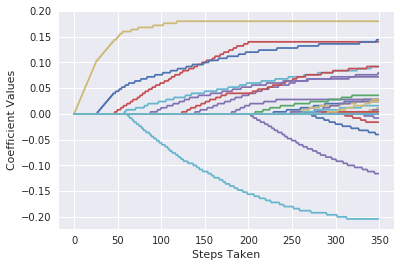

In [7]:
for i in range(n_col):
    # plot range of beta values for each attribute
    coef_curve = [beta_mat[k][i] for k in range(n_steps)]
    x_axis = range(n_steps)
    plt.plot(x_axis, coef_curve)
    
plt.xlabel('Steps Taken')
plt.ylabel('Coefficient Values')
plt.show()